In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

data = np.genfromtxt('interferometria.rad',comments='*')

In [34]:
temp = data[:,9:]  # temperatura
az = data[:,1]*np.pi/180  # azimut fuente
el = data[:,2]*np.pi/180  # elevacion fuente

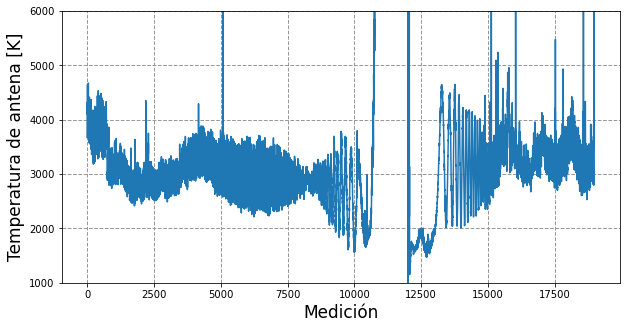

In [35]:
# Promediamos para obtener mediciones de continuo
plt.rcParams["figure.figsize"] = (10,5)

largo=len(temp)
temp_mean=[]

for espectro in temp:
    temp_mean.append(np.mean(espectro))
    
fig=plt.figure()
plt.plot(np.arange(len(temp_mean)),temp_mean)
plt.xlabel('Medición', fontsize=17)
plt.ylabel('Temperatura de antena [K]', fontsize=17)
plt.ylim(1000,6000)
plt.grid()
plt.grid(color = '0.6', linestyle = '--', linewidth = 1)
plt.savefig('Temp_promedio')
plt.show()

In [36]:
# Separamos mañana y tarde
temp_m = temp_mean[11494:]
az_m = az[11494:]
el_m = el[11494:]

temp_t = temp_mean[:11494]
az_t = az[:11494]
el_t = el[:11494]

In [37]:
# Creamos una matriz para los datos de la tarde y otra para los de la mañana
data_m = np.zeros((len(temp_m),3))
data_t = np.zeros((len(temp_t),3))

data_m[:, 0] = temp_m
data_m[:, 1] = az_m
data_m[:, 2] = el_m

data_t[:, 0] = temp_t
data_t[:, 1] = az_t
data_t[:, 2] = el_t

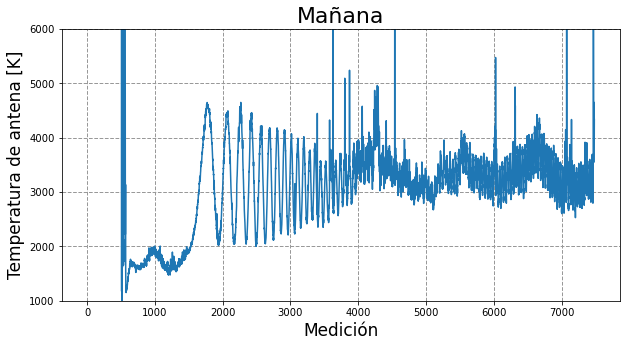

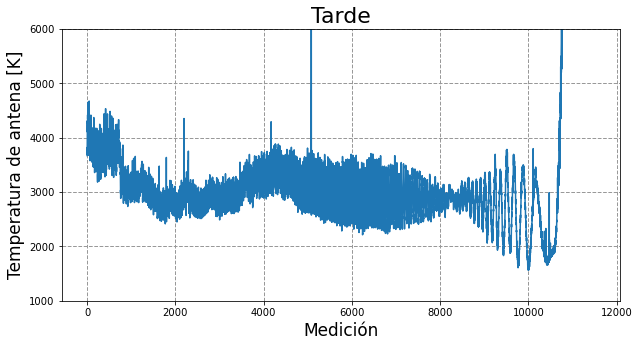

In [38]:
plt.ylim(1000,6000)
plt.grid()
plt.grid(color = '0.6', linestyle = '--', linewidth = 1)
plt.plot(np.arange(len(temp_m)), temp_m)
plt.xlabel('Medición', fontsize=17)
plt.ylabel('Temperatura de antena [K]', fontsize=17)
plt.title('Mañana', fontsize=22)
plt.savefig('Imagen1_mañana')
plt.show()

plt.ylim(1000,6000)
plt.grid()
plt.grid(color = '0.6', linestyle = '--', linewidth = 1)
plt.plot(np.arange(len(temp_t)),temp_t)
plt.xlabel('Medición', fontsize=17)
plt.ylabel('Temperatura de antena [K]', fontsize=17)
plt.title('Tarde', fontsize=22)
plt.savefig('Imagen1_tarde')
plt.show()

In [39]:
# Filtramos los datos 
promedio_t = np.mean(temp_t)
promedio_m = np.mean(temp_m)

data_m = data_m[2000:7000]
data_m = data_m[data_m[:, 0] < promedio_m+1000]

data_t = data_t[850:9_990]
data_t = data_t[data_t[:, 0] < promedio_t+1000]

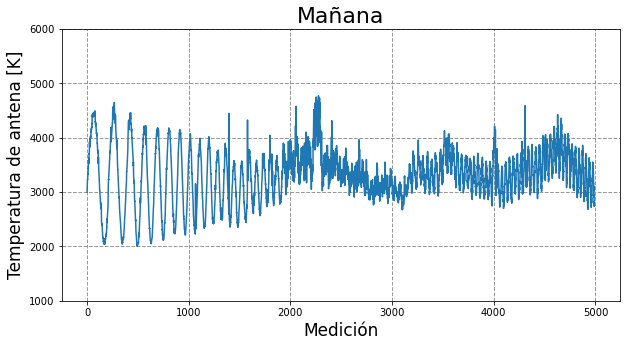

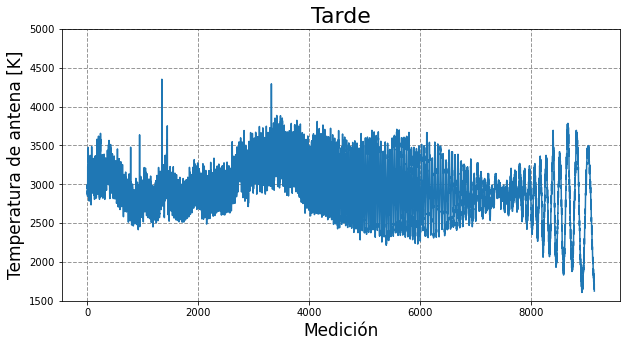

In [40]:
plt.ylim(1000,6000)
plt.grid(True)
plt.grid(color = '0.6', linestyle = '--', linewidth = 1)
plt.plot(np.arange(len(data_m[:, 0])), data_m[:, 0])
plt.xlabel('Medición', fontsize=17)
plt.ylabel('Temperatura de antena [K]', fontsize=17)
plt.title('Mañana', fontsize=22)
plt.savefig('Imagen2_mañana')
plt.show()

plt.ylim(1500,5000)
plt.grid()
plt.grid(color = '0.6', linestyle = '--', linewidth = 1)
plt.plot(np.arange(len(data_t[:, 0])),data_t[:, 0])
plt.xlabel('Medición', fontsize=17)
plt.ylabel('Temperatura de antena [K]', fontsize=17)
plt.title('Tarde', fontsize=22)
plt.savefig('Imagen2_tarde')
plt.show()

/Users/catalinavargas/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


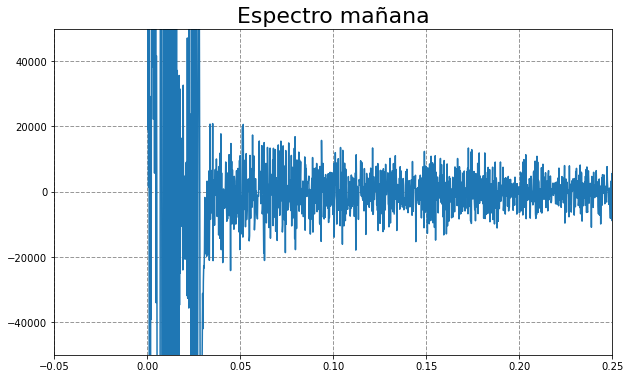

/Users/catalinavargas/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


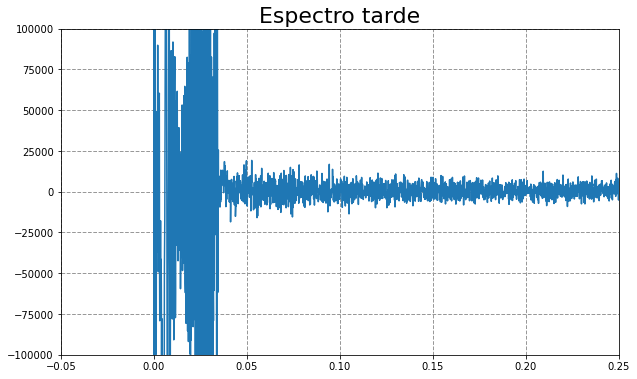

In [41]:
# Transformada de fourier para obtener espectro

#mañana
esp_m = np.fft.rfft(data_m[:, 0])
f_m = np.fft.rfftfreq(len(data_m[:, 0]))
#tarde
esp_t = np.fft.rfft(data_t[:, 0])
f_t = np.fft.rfftfreq(len(data_t[:, 0]))

plt.rcParams["figure.figsize"] = (10,6)

# Graficamos    
plt.plot(f_m,esp_m)
plt.title('Espectro mañana', fontsize=22)
plt.xlim(-0.05,0.25)
plt.ylim(-50000,50000)
plt.grid()
plt.grid(color='0.6', linestyle='--', linewidth=1)
plt.savefig('Espectro_mañana')
plt.show()

plt.plot(f_t,esp_t)
plt.title('Espectro tarde', fontsize=22)
plt.xlim(-.05,0.25)
plt.ylim(-100000,100000)
plt.grid()
plt.grid(color='0.6', linestyle='--', linewidth=1)
plt.savefig('Espectro_tarde')
plt.show()

In [42]:
# Removemos las variaciones de periodo largo
for i in range(len(f_m)):
    if f_m[i] > 0.05:
        esp_m[i]=0
for i in range(len(f_t)):
    if f_t[i] > 0.05:
        esp_t[i]=0

# Eliminamos el "DC"
for i in range(10):
    esp_m[i]=0
for i in range(10):
    esp_t[i]=0

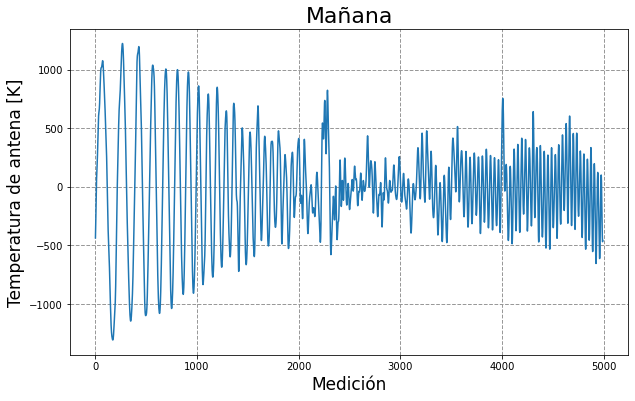

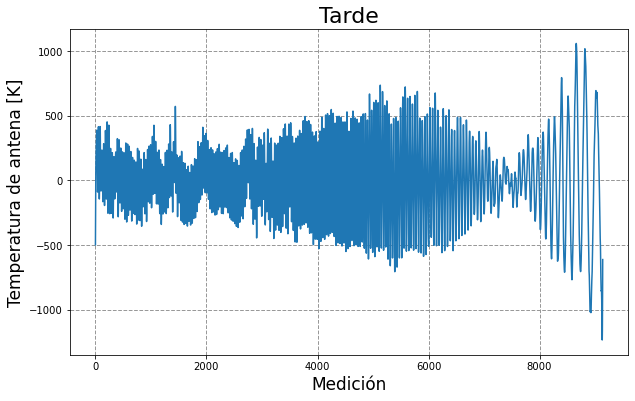

In [43]:
# Antitransformada de fourier 
data_m[:, 0] = np.fft.irfft(esp_m)
data_t[:, 0] = np.fft.irfft(esp_t)

# Graficamos
plt.grid()
plt.grid(color = '0.6', linestyle = '--', linewidth = 1)
plt.plot(np.arange(len(data_m[:, 0])), data_m[:, 0])
plt.xlabel('Medición', fontsize=17)
plt.ylabel('Temperatura de antena [K]', fontsize=17)
plt.title('Mañana', fontsize=22)
plt.savefig('Mañana_filtrada')
plt.show()

plt.grid()
plt.grid(color = '0.6', linestyle = '--', linewidth = 1)
plt.plot(np.arange(len(data_t[:, 0])), data_t[:, 0])
plt.xlabel('Medición', fontsize=17)
plt.ylabel('Temperatura de antena [K]', fontsize=17)
plt.title('Tarde', fontsize=22)
plt.savefig('Tarde_filtrada')
plt.show()

In [44]:
B = 37.85/0.211
alfa = 85.2*np.pi/180
Bs_m = B*np.sqrt(1-np.cos(data_m[:,1]-alfa)**2*np.cos(data_m[:,2])**2)
Bs_t = B*np.sqrt(1-np.cos(data_t[:,1]-alfa)**2*np.cos(data_t[:,2])**2)

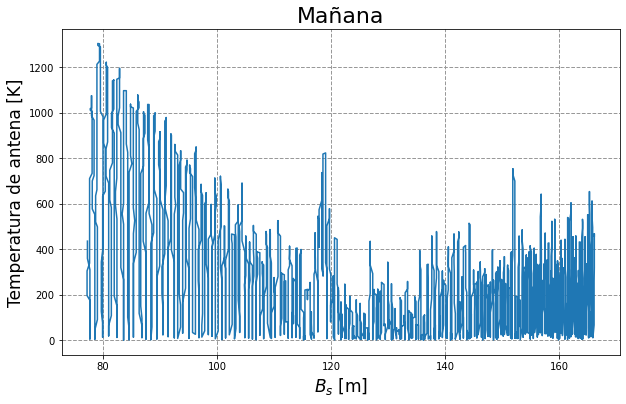

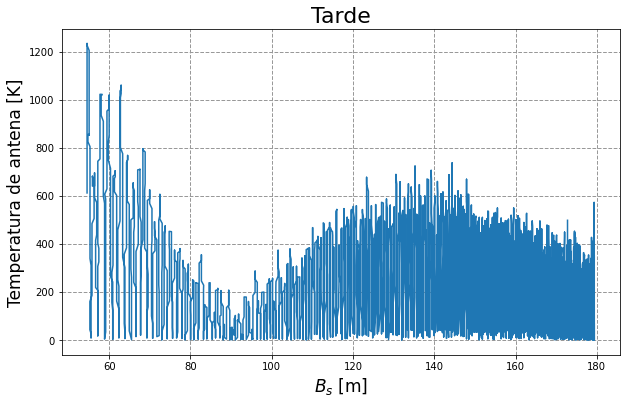

In [45]:
# Graficamos
plt.grid()
plt.grid(color = '0.6', linestyle = '--', linewidth = 1)
plt.plot(Bs_m, np.absolute(data_m[:, 0]))
plt.xlabel('$B_s$ [m]', fontsize=17)
plt.ylabel('Temperatura de antena [K]', fontsize=17)
plt.title('Mañana', fontsize=22)
plt.savefig('T_vs_Bs_mañana')
plt.show()

plt.grid()
plt.grid(color = '0.6', linestyle = '--', linewidth = 1)
plt.plot(Bs_t, np.absolute(data_t[:, 0]))
plt.xlabel('$B_s$ [m]', fontsize=17)
plt.ylabel('Temperatura de antena [K]', fontsize=17)
plt.title('Tarde', fontsize=22)
plt.savefig('T_vs_Bs_tarde')
plt.show()

In [46]:
def f_visibilidad(bs, a):
    a = a*np.pi/180
    return abs(np.sin(np.pi*a*bs)/(np.pi*a*bs))

a_m_optimo, a_m_covarianza = curve_fit(f_visibilidad, Bs_m, np.absolute(data_m[:, 0]))
a_t_optimo, a_t_covarianza = curve_fit(f_visibilidad, Bs_t, np.absolute(data_t[:, 0]))

<ipython-input-46-f5d479b58729>:3: RuntimeWarning: invalid value encountered in true_divide
  return abs(np.sin(np.pi*a*bs)/(np.pi*a*bs))


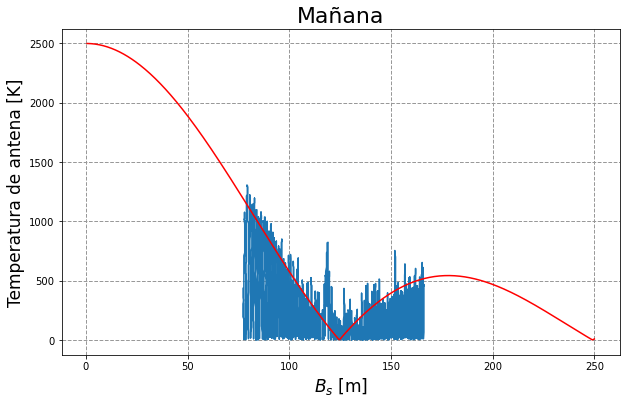

<ipython-input-46-f5d479b58729>:3: RuntimeWarning: invalid value encountered in true_divide
  return abs(np.sin(np.pi*a*bs)/(np.pi*a*bs))


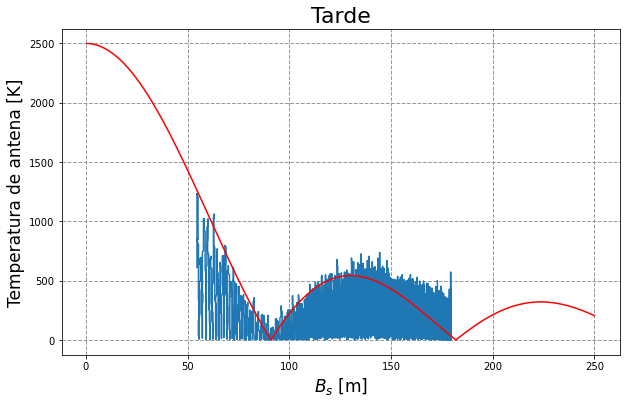

In [47]:
Bs = np.linspace(0, 250, 500)

# Graficamos
plt.grid()
plt.grid(color = '0.6', linestyle = '--', linewidth = 1)
plt.plot(Bs_m, np.absolute(data_m[:, 0]))
plt.plot(Bs, 2500*f_visibilidad(Bs, 0.46), c='r')
plt.xlabel('$B_s$ [m]', fontsize=17)
plt.ylabel('Temperatura de antena [K]', fontsize=17)
plt.title('Mañana', fontsize=22)
plt.savefig('Ajuste_mañana')
plt.show()

plt.grid()
plt.grid(color = '0.6', linestyle = '--', linewidth = 1)
plt.plot(Bs_t, np.absolute(data_t[:, 0]))
plt.plot(Bs, 2500*f_visibilidad(Bs, 0.63), c='r')
plt.xlabel('$B_s$ [m]', fontsize=17)
plt.ylabel('Temperatura de antena [K]', fontsize=17)
plt.title('Tarde', fontsize=22)
plt.savefig('Ajuste_tarde')
plt.show()